## Árboles de decisión

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../datasets/iris/iris.csv")
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
data.shape

(150, 5)

(array([50.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

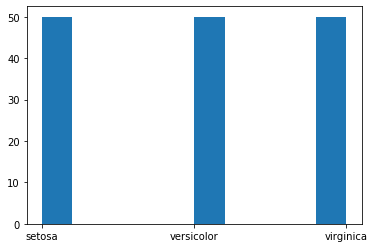

In [4]:
plt.hist(data.Species)

In [5]:
data.Species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [6]:
col_names = data.columns.values.tolist()
predictors = col_names[:4]
target = col_names[4]

In [7]:
#Generamos un arreglo de ceros y unos, utilizando 75% para entrenar y 25 para validar
data["is_train"] = np.random.uniform(0,1, len(data))<=0.75

In [8]:
data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,is_train
0,5.1,3.5,1.4,0.2,setosa,True
1,4.9,3.0,1.4,0.2,setosa,False
2,4.7,3.2,1.3,0.2,setosa,True
3,4.6,3.1,1.5,0.2,setosa,True
4,5.0,3.6,1.4,0.2,setosa,True


<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

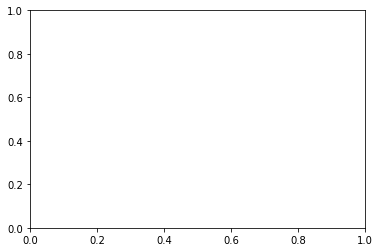

In [10]:
plt.hist(data.is_train)

In [10]:
train, test = data[data["is_train"]==True], data[data["is_train"]==False]

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [12]:
# Creamos nuestro árbol, clasificamos por entropía por algoritmo Id3, número de nodos de división: 20
tree = DecisionTreeClassifier(criterion="entropy", min_samples_split=20, random_state=99)
tree.fit(train[predictors], train[target])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [13]:
preds = tree.predict(test[predictors])

In [14]:
pd.crosstab(test[target], preds, rownames=["Actual"], colnames=["Predictions"])

Predictions,setosa,versicolor,virginica
Actual,,,
setosa,7,0,0
versicolor,0,11,2
virginica,0,0,12


## Visualización del árbol de decisión

In [15]:
from sklearn.tree import export_graphviz

In [16]:
with open("../notebooks/resources/iris_dtree.dot", "w") as dotfile:
    export_graphviz(tree, out_file=dotfile, feature_names=predictors)
    dotfile.close()

In [17]:
import os
from graphviz import Source

ModuleNotFoundError: No module named 'graphviz'

In [18]:
file = open("../notebooks/resources/iris_dtree.dot", "r")
text = file.read()
text

'digraph Tree {\nnode [shape=box] ;\n0 [label="Petal.Length <= 2.45\\nentropy = 1.582\\nsamples = 118\\nvalue = [43, 37, 38]"] ;\n1 [label="entropy = 0.0\\nsamples = 43\\nvalue = [43, 0, 0]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Petal.Length <= 4.85\\nentropy = 1.0\\nsamples = 75\\nvalue = [0, 37, 38]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="Petal.Width <= 1.65\\nentropy = 0.303\\nsamples = 37\\nvalue = [0, 35, 2]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.0\\nsamples = 34\\nvalue = [0, 34, 0]"] ;\n3 -> 4 ;\n5 [label="entropy = 0.918\\nsamples = 3\\nvalue = [0, 1, 2]"] ;\n3 -> 5 ;\n6 [label="Petal.Width <= 1.75\\nentropy = 0.297\\nsamples = 38\\nvalue = [0, 2, 36]"] ;\n2 -> 6 ;\n7 [label="entropy = 0.918\\nsamples = 6\\nvalue = [0, 2, 4]"] ;\n6 -> 7 ;\n8 [label="entropy = 0.0\\nsamples = 32\\nvalue = [0, 0, 32]"] ;\n6 -> 8 ;\n}'

Source(text)

## Cross Validation para la poda

In [71]:
X = data[predictors]
Y = data[target]

KeyError: "None of [Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',\n       'ptratio', 'black', 'lstat'],\n      dtype='object')] are in the [columns]"

In [37]:
tree = DecisionTreeClassifier(criterion="entropy", max_depth=5, min_samples_split=20, random_state=99)
tree.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=99, splitter='best')

In [45]:
from sklearn.model_selection import KFold, cross_val_score

In [52]:
cv = KFold( n_splits=10, shuffle=True, random_state=1)

In [53]:
scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
scores

array([1.        , 0.93333333, 0.93333333, 0.93333333, 1.        ,
       0.93333333, 1.        , 0.86666667, 0.93333333, 0.8       ])

In [54]:
score = np.mean(scores)
score

0.9333333333333333

In [55]:
#Max depth el máximo de profundidad del árbol. Es decir cuánto crece desde el nodo raíz
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy", max_depth=i, min_samples_split=20, random_state=99)
    tree.fit(X,Y)
    cv = KFold( n_splits=10, shuffle=True, random_state=1)
    scores = cross_val_score(tree, X, Y, scoring="accuracy", cv = cv, n_jobs=1)
    score = np.mean(scores)
    print("Score para i = ",i," es de ", score)
    print("   ",tree.feature_importances_) #Rasgos de importancia para saber cuales son los más importantes en el
                                            # modelo
    
    
    

Score para i =  1  es de  0.5666666666666667
    [0. 0. 1. 0.]
Score para i =  2  es de  0.9200000000000002
    [0.         0.         0.66620285 0.33379715]
Score para i =  3  es de  0.9400000000000001
    [0.         0.         0.68976981 0.31023019]
Score para i =  4  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  5  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  6  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  7  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  8  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  9  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]
Score para i =  10  es de  0.9333333333333333
    [0.         0.         0.66869158 0.33130842]


In [56]:
cross_val_score?

# Árboles de Regresión

In [19]:
#LA mayoría de las variable spredictoras son contínuas. El propósito de usar un árbol de regresión, tratar de predecir
# cuánto vale una casa en la zona de Boston 
data = pd.read_csv("../datasets/boston/Boston.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [20]:
data.shape

(506, 14)

In [23]:
colnames = data.columns.values.tolist()
predictors = colnames[:13]
target = colnames[13]
X = data[predictors]
Y = data[target]

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
# DecisionTreeRegressor(mínimo numero de muestras para hacer una división, mínimo número de hojas, random )
regtree = DecisionTreeRegressor(min_samples_split = 30, min_samples_leaf = 10, random_state=0)
regtree.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=30, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [27]:
#Ahora que tenemos el modelo, llevamos acabo algunas predicciones
preds = regtree.predict(data[predictors])

In [28]:
data["preds"] = preds

In [29]:
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,preds
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,22.840000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,22.840000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,35.247826
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,35.247826
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.247826


In [30]:
#Comparamos nuestras predicciones con el valor a predecir
data[["preds", "medv"]]

,preds,medv
0,22.840000,24.0
1,22.840000,21.6
2,35.247826,34.7
3,35.247826,33.4
4,35.247826,36.2
...,...,...
501,22.840000,22.4
502,20.624138,20.6
503,28.978261,23.9
504,31.170000,22.0


In [33]:
from sklearn.tree import export_graphviz
with open("../notebooks/resources/boston_rtree.dot", "w") as dotfile:
    export_graphviz(regtree, out_file=dotfile, feature_names=predictors)
    dotfile.close()
    
import os
from graphviz import Source
file = open("resources/boston_rtree.dot", "r")
text = file.read()
Source(text)

ModuleNotFoundError: No module named 'graphviz'

In [54]:
cv = KFold( n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(regtree, X, Y, cv = cv, n_jobs=1)
print(scores)
score = np.mean(scores)
print(score)

[0.85293137 0.83493537 0.7726901  0.45227168 0.88318504 0.73121579
 0.75464413 0.67031453 0.79895153 0.83052528]
0.7581664833903177


In [46]:
list(zip(predictors,regtree.feature_importances_))

[('crim', 0.03421203230639308),
 ('zn', 0.0),
 ('indus', 0.0011605887788380146),
 ('chas', 0.0),
 ('nox', 0.01856163073811432),
 ('rm', 0.6308568014337028),
 ('age', 0.01725115143448847),
 ('dis', 0.0013745115995791378),
 ('rad', 0.0),
 ('tax', 0.0023698305298803803),
 ('ptratio', 0.009333247332530954),
 ('black', 0.0),
 ('lstat', 0.28488020584647283)]

In [55]:
scores

array([0.85293137, 0.83493537, 0.7726901 , 0.45227168, 0.88318504,
       0.73121579, 0.75464413, 0.67031453, 0.79895153, 0.83052528])

## Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
forest = RandomForestRegressor(n_jobs = 2, oob_score=True, n_estimators=1000)
forest.fit(X,Y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=2,
                      oob_score=True, random_state=None, verbose=0,
                      warm_start=False)

In [65]:
data["rforest_pred"]=forest.oob_prediction_
data[["rforest_pred", "medv"]]

,rforest_pred,medv
0,28.476253,24.0
1,22.730163,21.6
2,34.269634,34.7
3,34.977922,33.4
4,34.244715,36.2
...,...,...
501,24.409467,22.4
502,19.382081,20.6
503,27.796316,23.9
504,26.284308,22.0


In [66]:
# En ek caso de random forest no es necesaria la validación cruzada, simplemente mostramos la diferencia

data["rforest_error2"] = (data["rforest_pred"]-data["medv"])**2 #mean squared error
sum(data["rforest_error2"])/len(data)

10.19119974295898

In [67]:
forest.oob_score_ # similar al coeficiente de determinación

0.8792791598654399

In [68]:
#También podemos hacer un modelo de clasificación
from sklearn.ensemble import RandomForestClassifier

In [69]:
forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=100)
forest.fit(X,Y)

ValueError: Unknown label type: 'continuous'

In [72]:
forest.oob_decision_function_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_decision_function_'